# 1.Exploratory Data Anaylysis(EDA) on Haberman's Dataset



In [15]:
# importing Pandas library to import Haberman's dataset and other libraries to plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data from Haberman's dataset to Dataframe

Haberman_df=pd.read_csv("D:\Applied AI Course Assignments\haberman.csv",header=0)

In [3]:
#Displaying first 5 datapoints

Haberman_df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
#Adding Column Names to the dataframe since the dataset does not have the column names.

columns=['Age','Op_Year','Axillary_Nodes','Survival_Status']
Haberman_df=pd.read_csv("D:\Applied AI Course Assignments\haberman.csv",header=0,names=columns)
Haberman_df.head(10)



,Age,Op_Year,Axillary_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [5]:
# To display # of datapoints and features

Haberman_df.shape

(305, 4)

Observations:
    
    1.There are total 305 datapoints.
    2.There are 4 columns.

In [6]:
#To display the Column Names(Features)

Haberman_df.columns

Index(['Age', 'Op_Year', 'Axillary_Nodes', 'Survival_Status'], dtype='object')

In [7]:
# To display the number of datapoints for each class of Survival_Status feature

Haberman_df['Survival_Status'].value_counts()

1    224
2     81
Name: Survival_Status, dtype: int64

Observations:
    
    1.There are 224 datapoints which are of class 1(Survived more than 5 years).
    2.There are 81 datapoints which are of class 2(Not Survived more than 5 years)
    3.The dataset is not Balanced dataset since the Classes are not distributed equally.

In [8]:
#To describe the dataset

Haberman_df.describe()

,Age,Op_Year,Axillary_Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:
    
1.The data points for Op_Year are less spreaded out than Age and Axillary_Nodes

In [9]:
# To display the info of the dataset
Haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                305 non-null int64
Op_Year            305 non-null int64
Axillary_Nodes     305 non-null int64
Survival_Status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [10]:
#To find if there are any NaN values or not

Haberman_df.isnull().sum()

Age                0
Op_Year            0
Axillary_Nodes     0
Survival_Status    0
dtype: int64

Observations:There are no NaN values.

In [11]:
# Converting 1 to Yes and 2 to No for better understanding
Haberman_df['Survival_Status']=Haberman_df['Survival_Status'].map({1:'Yes',2:'No'})
Haberman_df.head(10)

,Age,Op_Year,Axillary_Nodes,Survival_Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes
5,33,60,0,Yes
6,34,59,0,No
7,34,66,9,No
8,34,58,30,Yes
9,34,60,1,Yes


# 2.2-D Scatter Plot

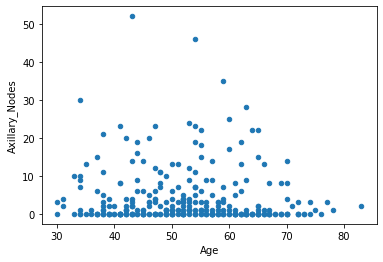

In [12]:
# 2-D Scatter Plot between Age and Axillary Nodes
Haberman_df.plot(kind='scatter',x='Age',y='Axillary_Nodes')
plt.show()

Observations:
    
    The plot does not give proper information since the dtapoints are in the same color.Therefore,the above plot is modified as below

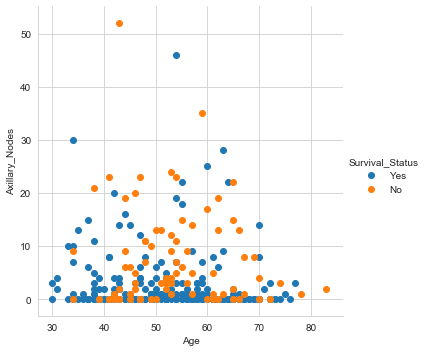

In [13]:
# 2-D Scatter Plot with color code for each class of Survival_Status

sns.set_style("whitegrid")
sns.FacetGrid(Haberman_df,hue='Survival_Status',height=5)\
.map(plt.scatter,'Age','Axillary_Nodes')\
.add_legend()
plt.show()

Observations:
    
    1.It is difficult to separate the datapoints of class Yes and No since the datapoints are overlapped.
    2.The Concentration of the points of class Yes and No is high when Axillary_Nodes are from 0-10
    3.The Patients with  Axillary_Notes from 0 to 1 are more likely to Survive more than 5 years.

# 3.Pair Plot

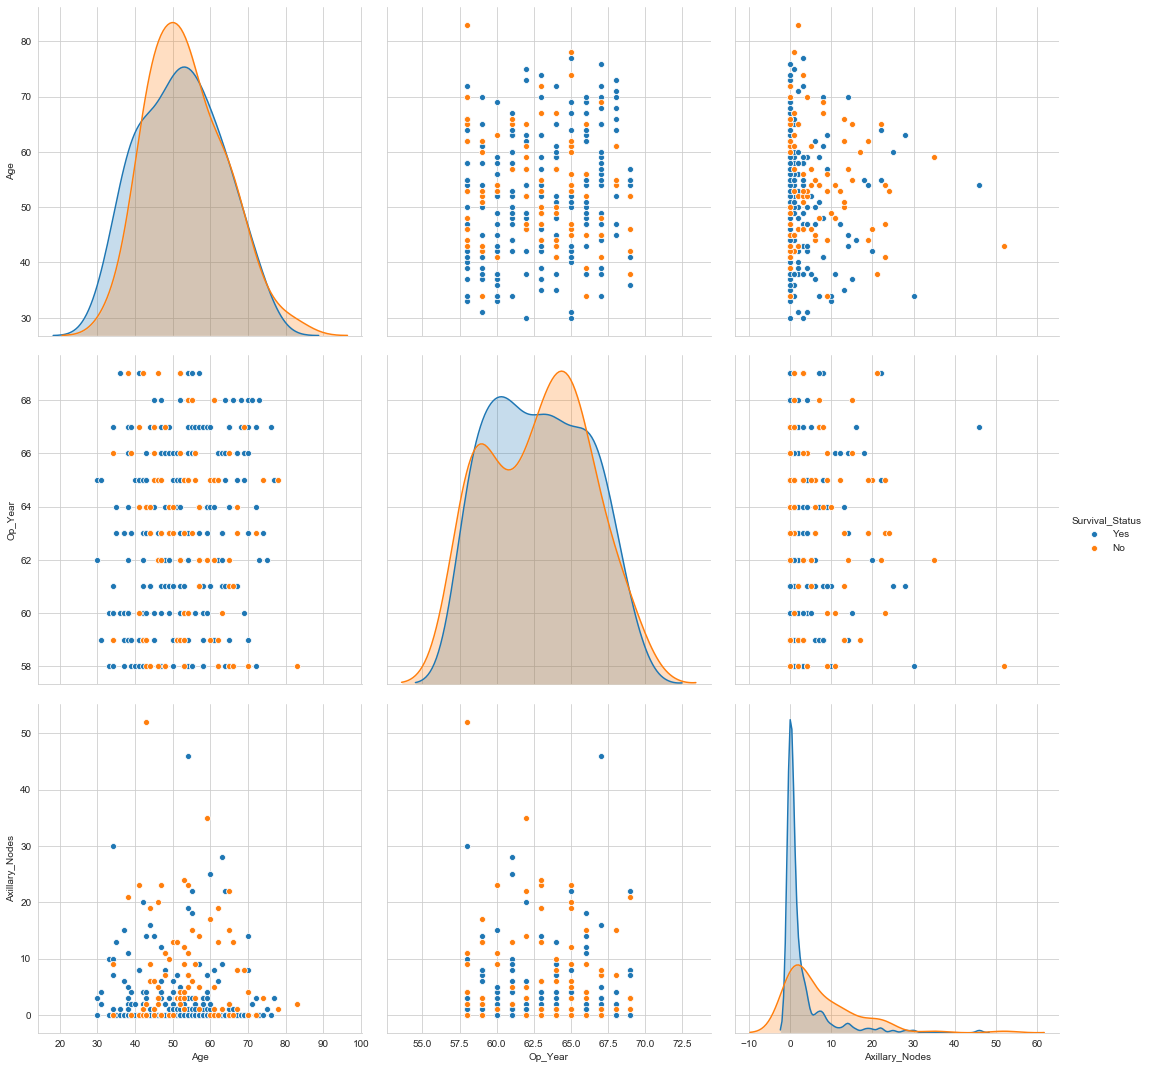

In [14]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(Haberman_df,hue='Survival_Status',height=5)
plt.show()

Observations:
    
    
    1.Op_Year feature is not useful feature to classify the Survival status since all data points are almost overlapped.
    2.Axillary_Nodes and Age features are mirror images of each other.
    3.Axillary_Nodes and Age features are overlapped.Therefore,it is difficult to separate the datapoints of class Yes/No.
    4.There is no linear relationship between Axillary_Nodes and Age features.
    

# 4.Histogram,PDF,CDF

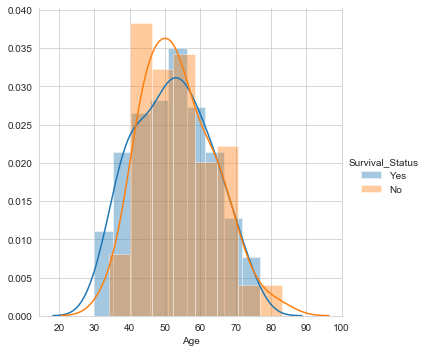

In [16]:
# 1-D distplot plot for Age

sns.set_style("whitegrid")
sns.FacetGrid(Haberman_df,hue='Survival_Status',height=5)\
.map(sns.distplot,'Age')\
.add_legend()
plt.show()



Observations:
    
    1.It is difficult to classify the points since the plots are almost overlapped.
    2.There are very few patients with the age 20,30,80,90 who have Survived more than 5 years and not Survived more than 5 years.
    3.There are more patients who are not Survived more than 5 years between the age 40 and 55.
    4.There are more patients who are Survived more than 5 years between the age 50 and 55.
    
    

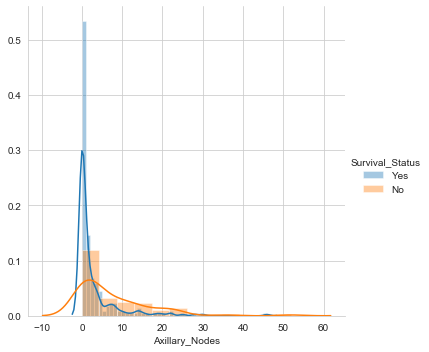

In [17]:
# 1-D distplot plot for Axillary_Nodes

sns.set_style("whitegrid")
sns.FacetGrid(Haberman_df,hue='Survival_Status',height=5)\
.map(sns.distplot,'Axillary_Nodes')\
.add_legend()
plt.show()


Observations:
    
    1.There are more patients who have Axillary_Nodes from 0 to 1 are Survived more than 5 years.
    2.There are no patients who have Axillary_Nodes from 30 to 60 are Survived.
    3.There are few patients who have Axillary_Nodes from 0 to 25 are not Survived more than 5 years.

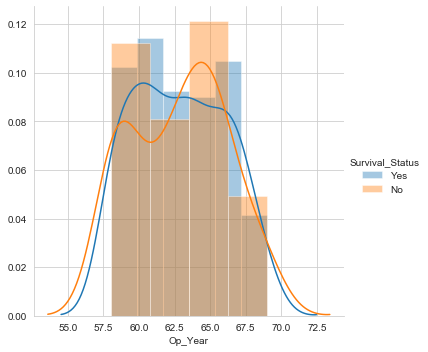

In [18]:
# 1-D distplot for Op_Year

sns.set_style("whitegrid")
sns.FacetGrid(Haberman_df,hue='Survival_Status',height=5)\
.map(sns.distplot,'Op_Year')\
.add_legend()
plt.show()

Observations:
    
    1.It is difficult to classify since the data plots are almost overlapped.

In [19]:
# To separate the classess into 2 dataframes
Haberman_df_Yes=Haberman_df.loc[Haberman_df['Survival_Status']=='Yes']
Haberman_df_No=Haberman_df.loc[Haberman_df['Survival_Status']=='No']
Haberman_df_Yes.head()

,Age,Op_Year,Axillary_Nodes,Survival_Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


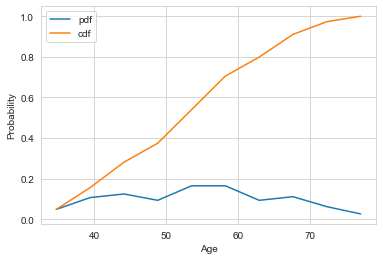

In [36]:
#Plotting pdf,CDF for Age with Survival_Status=Yes
counts, bin_edges = np.histogram(Haberman_df_Yes['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show();

Observations:

1.From pdf,we can see that there are 18% of points between the age 52 and 58

2.From cdf,we can see that there are 90% of points of Survival Class "Yes" which are age <70

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


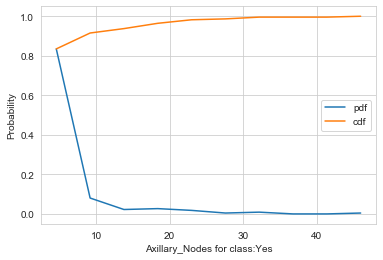

In [42]:
#Plotting pdf,CDF for Axillary_Nodes with Survival_Status:Yes
counts, bin_edges = np.histogram(Haberman_df_Yes['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel("Axillary_Nodes for class:Yes")
plt.ylabel("Probability")
plt.legend()
plt.show();

Observations:
    
    1.From the pdf,we can see that there are very less % of points between 10 and 40 and more % of points <10.
    
    2.From cdf,we can see that there 90% of points of Survival status:Yes which are of Axillay_Nodes<10.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


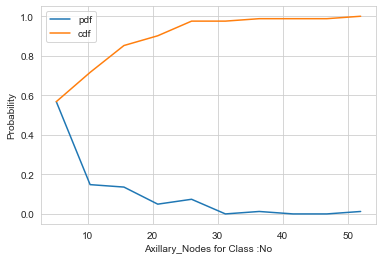

In [43]:
#Plotting pdf,CDF for Axillary_Nodes with Survival Status:No
counts, bin_edges = np.histogram(Haberman_df_No['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel("Axillary_Nodes for Class :No")
plt.ylabel("Probability")
plt.legend()
plt.show();

Observations:
    
    1.From pdf,we can see that there are 18% points between the Axillay_Nodes 10 to 15.
    
    2.From cdf,we can see that there are 98% of points of Survival status :No which have Axxilay_Nodes < 25.

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


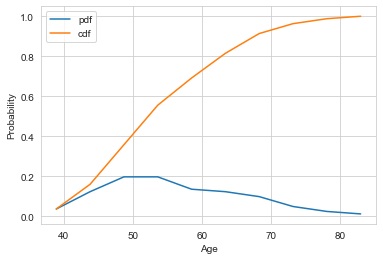

In [39]:
#Plotting pdf,CDF for Age with Survival Status:No
counts, bin_edges = np.histogram(Haberman_df_No['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show();

Observations:
    
1.From pdf,we can say that theere are 20% of points between age 48 and 54.
    
2.From cdf,we can say that there are 90% of points of class Survical Satus="No" which are age<70

# 6.Mean,Variance,Std-Dev

In [25]:
#Mean, Variance, Std-deviation,  
print("Means of Survival Class: Yes :")
print(np.mean(Haberman_df_Yes["Axillary_Nodes"]))
print(np.mean(Haberman_df_Yes["Age"]))

print("\nStd-dev for Survival Class:Yes:");
print(np.std(Haberman_df_Yes["Axillary_Nodes"]))
print(np.std(Haberman_df_Yes["Age"]))


Means of Survival Class: Yes :
2.799107142857143
52.11607142857143

Std-dev for Survival Class:Yes:
5.869092706952767
10.913004640364269


Observations:
    
    1.The data points with Axillary_Nodes are less spread out than Age for Survival Class: Yes

In [26]:
print("Means of Survival Class: No :")
print(np.mean(Haberman_df_No["Axillary_Nodes"]))
print(np.mean(Haberman_df_No["Age"]))

print("\nStd-dev:");
print(np.std(Haberman_df_No["Axillary_Nodes"]))
print(np.std(Haberman_df_No["Age"]))


Means of Survival Class: No :
7.45679012345679
53.67901234567901

Std-dev:
9.128776076761632
10.10418219303131


Observations:
    
    1.The data points with Axillary_Nodes are less spread out than Age for Survival Class: No

# 7.Median, Quantiles, Percentiles, IQR

In [28]:
# Median, Quantiles, Percentiles, IQR.
print("\nMedians with Axillary_Nodes:")
print(np.median(Haberman_df_Yes["Axillary_Nodes"]))
print(np.median(Haberman_df_No["Axillary_Nodes"]))

print("\nMedians with Age:")
print(np.median(Haberman_df_Yes["Age"]))
print(np.median(Haberman_df_No["Age"]))

print("\nQuantiles with Survival_Status:Yes:")
print(np.percentile(Haberman_df_Yes["Axillary_Nodes"],np.arange(0, 100, 25)))
print(np.percentile(Haberman_df_Yes["Axillary_Nodes"],np.arange(0, 100, 25)))

print("\nQuantiles with Survival_Status:No:")
print(np.percentile(Haberman_df_No["Axillary_Nodes"],np.arange(0, 100, 25)))
print(np.percentile(Haberman_df_No["Axillary_Nodes"],np.arange(0, 100, 25)))


print("\nQuantiles:")
print(np.percentile(Haberman_df_Yes["Axillary_Nodes"],np.arange(0, 100, 25)))
print(np.percentile(Haberman_df_No["Axillary_Nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(Haberman_df_Yes["Axillary_Nodes"],90))
print(np.percentile(Haberman_df_No["Axillary_Nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_df_Yes["Axillary_Nodes"]))
print(robust.mad(Haberman_df_No["Axillary_Nodes"]))




Medians with Axillary_Nodes:
0.0
4.0

Medians with Age:
52.0
53.0

Quantiles with Survival_Status:Yes:
[0. 0. 0. 3.]
[0. 0. 0. 3.]

Quantiles with Survival_Status:No:
[ 0.  1.  4. 11.]
[ 0.  1.  4. 11.]

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# 8.Box plot and Whiskers

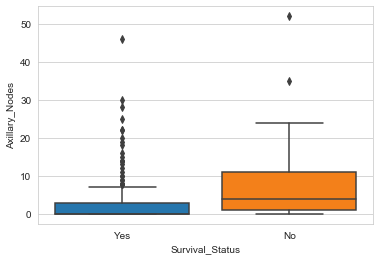

In [29]:
#Ploting Box plot for Axillary_Nodes

sns.boxplot(x='Survival_Status',y='Axillary_Nodes',data=Haberman_df,width=0.8,saturation=0.9)
plt.show()

Observations:
    
    1.The mean of Class: No is more than the mean of Class: Yes
    2.There are many Outliers for Class: Yes compared to Class: No
    3.The Upper Whisker of Class:No has more number of Axillary_Nodes than Class :Yes
    4.The data points for the Class: No are more positively skewed.
    5.The IQR of Class: No is more than the IQR of Class:Yes

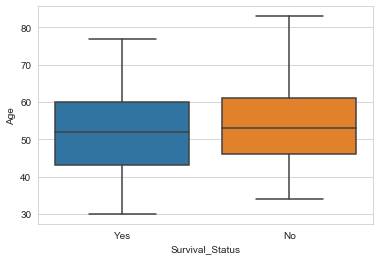

In [30]:
#Ploting Box plot for Age
sns.boxplot(x='Survival_Status',y='Age',data=Haberman_df)
plt.show()

Observations:
    
    1.The Means of Class: Yes is slightly less than class:No
    2.The IQR of Class : Yes is slightly greater than class:No
    3.The Class: Yes is slightly more negatively skewed.
    4.The Class: No is almost symmetrically skewed.
    5.The Upper and Lower Quantile ranges of Class: No are slightly more than Class: Yes
    6.None of the Classes is affected with outliers.Therefore,Feature:Age is more useful than Axillary_Nodes for better performance to build the model.

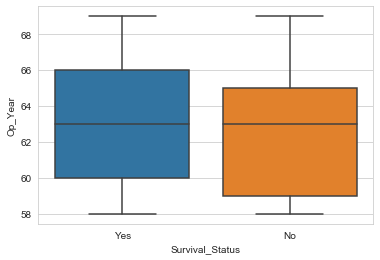

In [31]:
#Ploting Box plot for Age
sns.boxplot(x='Survival_Status',y='Op_Year',data=Haberman_df)
plt.show()

Observations:
    
    1.The Class:Yes is symmetrically distributed.
    2.The Class: No is neagatively distributed.
    3.The means of Class:Yes and No are same.
    4.The Whiskers of both clasesses are same.
    5.There are no outliers.

# 9.Violin Plots

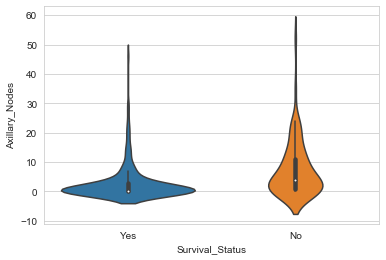

In [32]:
#Violin Plot for Axillary_Nodes
sns.violinplot(x='Survival_Status',y='Axillary_Nodes',data=Haberman_df)
plt.show()

Observation:
    
    1.The Axillary_Nodes for both classes Yes and No has skewed distribution shape.

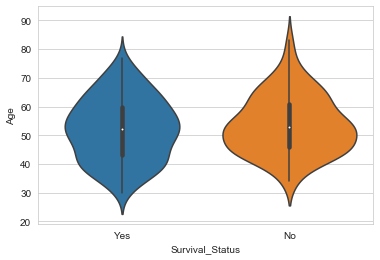

In [33]:
#Violin Plot for Age
sns.violinplot(x='Survival_Status',y='Age',data=Haberman_df)
plt.show()

Observations:
    
    1.Class :Yes and No are not affected by outliers.
    2.The Violin plots for Age are more fatter than Axillary_Nodes.
    3.The Age for both classes has almost Normal distribution.

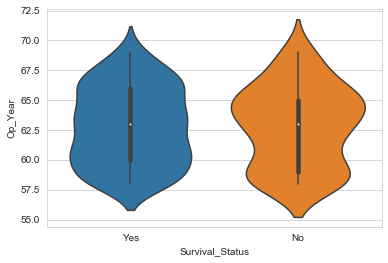

In [41]:
#Violin Plot for Op_Year
sns.violinplot(x='Survival_Status',y='Op_Year',data=Haberman_df)
plt.show()

Observations:
    
    1.There are no outliers.
    
    2.The Op_year dose not have Normal distribution shape for both classes.

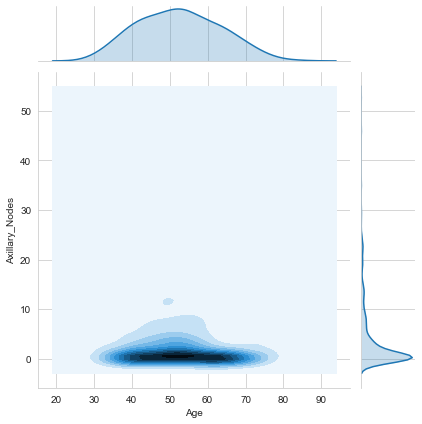

In [35]:
# 10.Contour Plots(Joint plots)
sns.jointplot(x='Age',y='Axillary_Nodes',data=Haberman_df,kind='kde')
plt.show()


Observations: 
    
    1.The datapoints are more densed for the age between 40-65 and Axillary_Nodes between 0-1.
    
    2.The Age has "Normal distribution" shape.
    
    3.The Axillary_Nodes has "Left skewed" distribution.

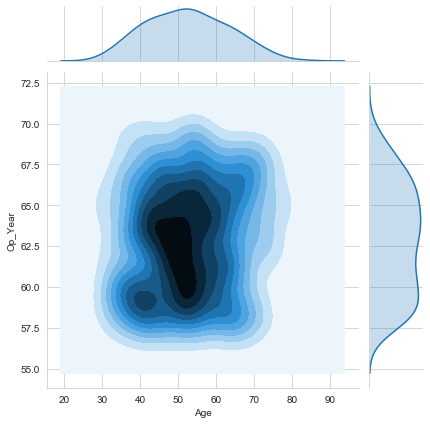

In [44]:
# 10.Contour Plots(Joint plots)
sns.jointplot(x='Age',y='Op_Year',data=Haberman_df,kind='kde')
plt.show()


Observations:
    
    1.From the plot, we can see that Age has Normal distribution and Op_Year has almost Normal distribution.
    
    2.There are more points between age 50 and 55 and Op_year 58 to 64.